# Técnicas de Programación
## Actividad 1: Modelo de Atmósfera Estándar

El objetivo de esta actividad es el de crear una función que permita calcular la presión, temperatura y densidad de la atmósfera terrestre en función de la altura desde la superficie, para el intervalo entre 0 y 32000 metros, a partir de las relaciones establecidas en el Modelo de Atmósfera Estándar de la International S A (ISA).
Para ello, se creará la función ISA(h) que devuelva las magnitudes antes mencionadas en función de la altura h, con (0<= h <= 32000). A continuación, se crearán tres 3 arrays P,T,Ro con 320 valores de Presión, Temperatura y Densidad distribuidos uniformemente entre h=0 y h=32000. Finalmente, se representará gráficamente las curvas de variación de las tres magnitudes.
La descripción del modelo puede consultarse en el siguiente sitio:
https://es.wikipedia.org/wiki/Atmósfera_Estándar_Internacional

# Se pide 1: Función ISA(h)

In [147]:
#Función ISA(h) Es una funcion que se aplicara sobre un vector por lo cual procurare vectorizarla p/evitar bucles
import numpy as np

h = np.arange(0, 32000, 100) #defino el vector de valores de h sobre los que se calcularán los valores solicitados
h_0= 0
h_1 = 11000
h_2 = 20000
a_0 = -6.5/1000
a_1 = 0
a_2 = 1.0/1000
T_0 = 288.15
T_1 = 216.65
T_2 = 216.65
p_0 = 101325
p_1 = 22632
p_2 = 5474.9
Ro_0 = 1.2250
Ro_1 = 0.3639
Ro_2 = 0.0880
g = 9.80665
R = 287.0



Se define la temperatura atmosférica como una función de la altura siguiendo el modelo ISA.


In [250]:
#funcion de temperatura, presión y densidad atmosférica: ISA(h)
    
def ISA(h):
    if h < 11000:
        return h, \
        round(T_0 + a_0 * (h - h_0), 2), \
        round((p_0*(((T_0 + a_0 * (h - h_0))/T_0)**(-g/(a_0*R)))), 2), \
        round((Ro_0*(((T_0 + a_0 * (h - h_0))/T_0)**(-1-(g/(a_0*R))))), 2)
    elif h < 20000:
        return h, \
        T_1, \
        round((p_1 * np.exp(-g/(R*T_1)*(h - h_1))),2), \
        round((Ro_1 * np.exp(-g/(R*T_1)*(h - h_1))),2)
    else:
        return h, \
        round(T_2 + a_2 * (h - h_2), 4), \
        round((p_2*(((T_2 + a_2 * (h - h_2))/T_2)**(-g/(a_2*R)))), 4), \
        round((Ro_2*(((T_2 + a_2 * (h - h_2))/T_2)**(-1-(g/(a_2*R))))), 4)
    
ISA_v=np.vectorize(ISA)  #vectorizo la función para que sea aplicable con numpy arrays
ISA = ISA_v(h)
print(ISA)



(array([    0,   100,   200,   300,   400,   500,   600,   700,   800,
         900,  1000,  1100,  1200,  1300,  1400,  1500,  1600,  1700,
        1800,  1900,  2000,  2100,  2200,  2300,  2400,  2500,  2600,
        2700,  2800,  2900,  3000,  3100,  3200,  3300,  3400,  3500,
        3600,  3700,  3800,  3900,  4000,  4100,  4200,  4300,  4400,
        4500,  4600,  4700,  4800,  4900,  5000,  5100,  5200,  5300,
        5400,  5500,  5600,  5700,  5800,  5900,  6000,  6100,  6200,
        6300,  6400,  6500,  6600,  6700,  6800,  6900,  7000,  7100,
        7200,  7300,  7400,  7500,  7600,  7700,  7800,  7900,  8000,
        8100,  8200,  8300,  8400,  8500,  8600,  8700,  8800,  8900,
        9000,  9100,  9200,  9300,  9400,  9500,  9600,  9700,  9800,
        9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700,
       10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600,
       11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500,
       12600, 12700

In [236]:
#transformo la tupla obtenida en un numpy array
ISA_ar = np.array(ISA) #chequeo dimensiones del array para verificar que la función se haya aplicado correctamente
print(ISA_ar.ndim) # número de ejes
print(ISA_ar.shape) # dimensiones de los ejes
print(ISA_ar.size) # número total de elementos
print(len(ISA_ar)) # longitud de la primera dimensión



2
(4, 320)
1280
4


In [251]:
print(ISA_ar) #chequeamos el array

[[0.00 100.00 200.00 ... 31700.00 31800.00 31900.00]
 [288.15 287.50 286.85 ... 228.35 228.45 228.55]
 [101325.00 100129.22 98944.89 ... 907.54 894.06 880.79]
 [1.23 1.21 1.20 ... 0.01 0.01 0.01]]


In [280]:
float_formatter = lambda x: "%.4f" % x    #función para formatear la vista del array
np.set_printoptions(formatter={'float_kind':float_formatter})


In [282]:
print(ISA_ar.T)    #array traspuesto formateado dimensiones: h, T(h), p(h), Ro(h)

[[0.0000 288.1500 101325.0000 1.2300]
 [100.0000 287.5000 100129.2200 1.2100]
 [200.0000 286.8500 98944.8900 1.2000]
 ...
 [31700.0000 228.3500 907.5400 0.0100]
 [31800.0000 228.4500 894.0600 0.0100]
 [31900.0000 228.5500 880.7900 0.0100]]


# Se pide 2: slices individuales 3 pares (altura, variable)

In [283]:
#tomo slice del array para cumplir con el "se pide 2"
T=(ISA_ar.T[:, 0:2])
print(T)
P=(ISA_ar.T[:, (0,2)])
print(P)
Ro=(ISA_ar.T[:, (0,3)])
print(Ro)

[[0.0000 288.1500]
 [100.0000 287.5000]
 [200.0000 286.8500]
 [300.0000 286.2000]
 [400.0000 285.5500]
 [500.0000 284.9000]
 [600.0000 284.2500]
 [700.0000 283.6000]
 [800.0000 282.9500]
 [900.0000 282.3000]
 [1000.0000 281.6500]
 [1100.0000 281.0000]
 [1200.0000 280.3500]
 [1300.0000 279.7000]
 [1400.0000 279.0500]
 [1500.0000 278.4000]
 [1600.0000 277.7500]
 [1700.0000 277.1000]
 [1800.0000 276.4500]
 [1900.0000 275.8000]
 [2000.0000 275.1500]
 [2100.0000 274.5000]
 [2200.0000 273.8500]
 [2300.0000 273.2000]
 [2400.0000 272.5500]
 [2500.0000 271.9000]
 [2600.0000 271.2500]
 [2700.0000 270.6000]
 [2800.0000 269.9500]
 [2900.0000 269.3000]
 [3000.0000 268.6500]
 [3100.0000 268.0000]
 [3200.0000 267.3500]
 [3300.0000 266.7000]
 [3400.0000 266.0500]
 [3500.0000 265.4000]
 [3600.0000 264.7500]
 [3700.0000 264.1000]
 [3800.0000 263.4500]
 [3900.0000 262.8000]
 [4000.0000 262.1500]
 [4100.0000 261.5000]
 [4200.0000 260.8500]
 [4300.0000 260.2000]
 [4400.0000 259.5500]
 [4500.0000 258.9000]


## Se pide 3: Gráficos




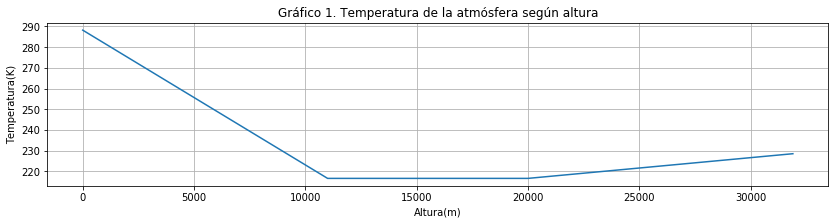

In [287]:
import matplotlib.pyplot as plt

from matplotlib import cm


x=T[:,0]     # discretizamos el intervalo 0,2 pi en 100 puntos. El valor por defecto es 50, pero se ve mejor con 100
y=T[:,1]       # calculamos los valores de y en los puntos x de la discretización anterior
plt.figure(1,figsize=(14,3))     # Construimos la figura con tamaño 10x5 (en teoría pulgadas)
plt.plot(x,y)
plt.xlabel('Altura(m)') # texto del eje X
plt.ylabel('Temperatura(K)') # igual para el Y
plt.title(r'Gráfico 1. Temperatura de la atmósfera según altura') # Titulo del grafico incluyendo formulas LateX
plt.grid(True) # Dibuja una cuadricula
plt.show()




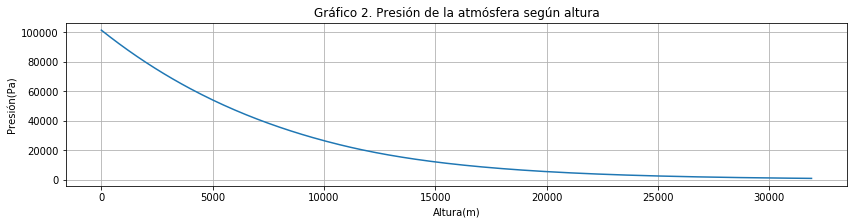

In [288]:
x=P[:,0]     # discretizamos el intervalo 0,2 pi en 100 puntos. El valor por defecto es 50, pero se ve mejor con 100
y=P[:,1]       # calculamos los valores de y en los puntos x de la discretización anterior
plt.figure(1,figsize=(14,3))     # Construimos la figura con tamaño 10x5 (en teoría pulgadas)
plt.plot(x,y)
plt.xlabel('Altura(m)') # texto del eje X
plt.ylabel('Presión(Pa)') # igual para el Y
plt.title(r'Gráfico 2. Presión de la atmósfera según altura') # Titulo del grafico incluyendo formulas LateX
plt.grid(True) # Dibuja una cuadricula
plt.show()

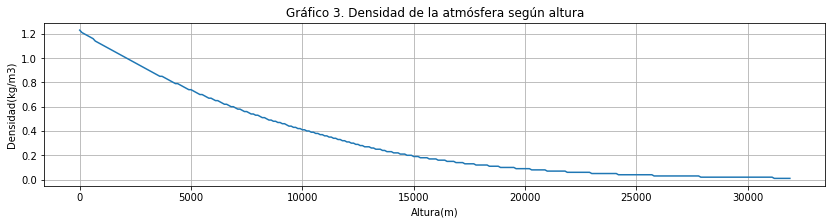

In [289]:
x=Ro[:,0]     # discretizamos el intervalo 0,2 pi en 100 puntos. El valor por defecto es 50, pero se ve mejor con 100
y=Ro[:,1]       # calculamos los valores de y en los puntos x de la discretización anterior
plt.figure(1,figsize=(14,3))     # Construimos la figura con tamaño 10x5 (en teoría pulgadas)
plt.plot(x,y)
plt.xlabel('Altura(m)') # texto del eje X
plt.ylabel('Densidad(kg/m3)') # igual para el Y
plt.title(r'Gráfico 3. Densidad de la atmósfera según altura') # Titulo del grafico incluyendo formulas LateX
plt.grid(True) # Dibuja una cuadricula
plt.show()


Se ha construido el modelo solicitado de acuerdo con las pautas establecidas. Se observa en el gráfico 1 la función lineal de la temperatura con la altura de la atmósfera, cuando el gradiente de temperatura de la capa (a) es distinto de cero. Asimismo, se observan las variaciones exponenciales de la presión y la densidad de la atmósfera, las que descienden en forma continua conforme se incrementa la altura.